# **Data Handling :**
In the following code blocks, we have read the h5 dataset (TVSum) and splitted it into train and test set.

In [ ]:
# Importing essential libraries
import h5py
import numpy as np
import tensorflow.keras as Keras
from sklearn.model_selection import train_test_split

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining a generator object to handle dataset
import h5py
import numpy as np
import tensorflow.keras as Keras
from sklearn.model_selection import train_test_split

class DataGenerator(Keras.utils.Sequence):

    def __init__(self,dataset,batch_size=5,shuffle=False):
        '''Initialise the dataset'''      
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        '''Returns length of the dataset'''
        return int(np.floor(len(self.dataset)/self.batch_size))

    def __getitem__(self,index):
        '''Returns items of given index'''
        indexes = self.indices[index * self.batch_size : (index+1) * self.batch_size]
        feature, label = self.__data_generation(indexes)

        return feature, label

    def __data_generation(self,indexes):
        '''Generates data from given indices'''
        feature = np.empty((self.batch_size,320,1024))
        label = np.empty((self.batch_size,320,1))

        for i in range(len(indexes)):
            feature[i,] = np.array(self.dataset[indexes[i]][0])
            label[i,] = np.array(self.dataset[indexes[i]][1]).reshape(-1,1)

        return feature,label

    def on_epoch_end(self):

        self.indices = np.arange(len(self.dataset))
        if self.shuffle == True:
            np.random.shuffle(self.indices)

In [ ]:
# Defining a class to read the h5 dataset
class DatasetMaker(object):

    def __init__(self,data_path):
        '''Read file from defined path'''

        self.data_file = h5py.File(data_path)

    def __len__(self):
        '''Returns length of the file'''

        return len(self.data_file)

    def __getitem__(self,index):
        '''Returns feature, label and index of varoius keys'''

        index += 1
        video = self.data_file['video_'+str(index)]
        feature = np.array(video['feature'][:])
        label = np.array(video['label'][:])

        return feature,label,index

# Defining a function to read and split the dataset into train and test
def get_loader(path, batch_size=5):
    '''Takes file path as argument and returns train and test set'''

    dataset = DatasetMaker(path)
    train_dataset, test_dataset = train_test_split(dataset, test_size = 0.2, random_state = 123)
    train_loader = DataGenerator(train_dataset)

    return train_loader, test_dataset

In [ ]:
# Loading and splitting the dataset
train_loader, test_dataset = get_loader('fcsn_tvsum.h5')

In [ ]:
# Getting an overview of train set
train_loader.__getitem__(1)

(array([[[0.33214834, 0.36458752, 0.34766391, ..., 0.42054603,
          0.38009831, 0.40780613],
         [0.3677392 , 0.32178515, 0.3589496 , ..., 0.38658553,
          0.40404913, 0.41493717],
         [0.32732472, 0.34487578, 0.34561759, ..., 0.39767522,
          0.40643126, 0.41305968],
         ...,
         [0.33563241, 0.37010661, 0.36633509, ..., 0.45292339,
          0.39594346, 0.37678552],
         [0.33977899, 0.36665431, 0.36543891, ..., 0.45478585,
          0.39663646, 0.37431845],
         [0.33928111, 0.36744118, 0.3657186 , ..., 0.45513114,
          0.39545387, 0.37432   ]],
 
        [[0.35793796, 0.32084152, 0.37723896, ..., 0.41072085,
          0.3839736 , 0.41116855],
         [0.36485991, 0.33529118, 0.37920213, ..., 0.41223219,
          0.3917633 , 0.43476462],
         [0.35199738, 0.36249325, 0.37726289, ..., 0.42207533,
          0.36644816, 0.38966513],
         ...,
         [0.3703391 , 0.3461917 , 0.37459537, ..., 0.40429765,
          0.33990452, 0.

In [ ]:
# Getting an overview of test set
test_dataset[1]

(array([[0.35971966, 0.3486733 , 0.36395055, ..., 0.42930636, 0.4150221 ,
         0.41987327],
        [0.36696154, 0.37052545, 0.37211522, ..., 0.4189313 , 0.4207554 ,
         0.39118388],
        [0.358309  , 0.37929296, 0.34820387, ..., 0.39622623, 0.39785638,
         0.3821973 ],
        ...,
        [0.3435912 , 0.33795008, 0.35553935, ..., 0.41903496, 0.40541124,
         0.42342108],
        [0.34438112, 0.347014  , 0.37080073, ..., 0.42950776, 0.3868425 ,
         0.36775845],
        [0.35290626, 0.35092926, 0.37546453, ..., 0.4372162 , 0.37105322,
         0.39629552]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1.

# **Model Training and Testing :**
In this section, we have defined various functions to handle the algorithm in order and trained the model and tested it over the test set.

In [ ]:
import numpy as np

def knapsack(s, w, c): #shot, weights, capacity


    shot = len(s) + 1 #number of shots
    cap = c + 1 #capacity threshold

    #matching the modified size by adding 0 at 0th index
    s = np.r_[[0], s] #adding 0 at 0th index (concatinating)
    w = np.r_[[0], w] #adding 0 at 0th index (concatinating)

    #Creating and Filling Dynamic Programming Table with zeros in shot x cap dimensions
    dp = [] #creating empty list or table
    for j in range(shot):
        dp.append([]) #s+1 rows
        for i in range(cap):
            dp[j].append(0) #c+1 columns

    #Started filling values from (2nd row, 2nd column) till (shot X cap) and keeping the values for 0th indexes as 0
    #following dynamic programming approach to fill values
    for i in range(1,shot):
        for j in range(1,cap):
            if w[i] <= j:
                dp[i][j] = max(s[i] + dp[i-1][j-w[i]], dp[i-1][j])
            else:
                dp[i][j] = dp[i-1][j]

    #choosing the optimal pair of keyshots
    choice = []
    i = shot - 1
    j = cap - 1
    while i > 0 and j > 0:
        if dp[i][j] != dp[i-1][j]: #starting from last element and going further
            choice.append(i-1)
            j = j - w[i]
            i = i - 1
        else:
            i = i - 1

    return dp[shot-1][cap-1], choice

In [ ]:
import numpy as np

def eval_metrics(y_pred, y_true):
    '''Returns precision, recall and f1-score of given prediction and true value'''
    overlap = np.sum(y_pred * y_true)
    precision = overlap / (np.sum(y_pred) + 1e-8)
    recall = overlap / (np.sum(y_true) + 1e-8)
    if precision == 0 and recall == 0:
        fscore = 0
    else:
        fscore = 2 * precision * recall / (precision + recall)

    return [precision, recall, fscore]

In [ ]:
def select_keyshots(video_info, pred_score):
    '''Returns predicted scores(upsampled), selected keyshots indices, predicted summary of given video'''
    vidlen = video_info['length'][()]
    cps = video_info['change_points'][:]
    weight = video_info['n_frame_per_seg'][:]
    pred_score = np.array(pred_score)
    pred_score = upsample(pred_score, vidlen)
    pred_value = np.array([pred_score[cp[0]:cp[1]].mean() for cp in cps])
    _, selected = knapsack(pred_value, weight, int(0.2 * vidlen))
    selected = selected[::-1]
    key_labels = np.zeros((vidlen,))
    for i in selected:
        key_labels[cps[i][0]:cps[i][1]] = 1

    return pred_score.tolist(), selected, key_labels.tolist()

In [ ]:
def upsample(down_arr, vidlen):
    '''Upsamples a given predicted score array to the size of video length'''
    up_arr = np.zeros(vidlen)
    ratio = vidlen // 320
    l = (vidlen - ratio * 320) // 2
    i = 0
    while i < 320:
        up_arr[l:l+ratio] = np.ones(ratio, dtype = int) * down_arr[0][i]
        l += ratio
        i += 1

    return up_arr

In [ ]:
import numpy as np
import json
import os
from tqdm import tqdm, trange
import h5py
from prettytable import PrettyTable

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Concatenate
from tensorflow.keras.layers import Attention
from tensorflow.keras import Input, Model

def evaluate(epoch_i):
    '''Evaluates the model for given epoch on test dataset'''
    out_dict = {}
    eval_arr = []
    table = PrettyTable()
    table.title = 'Evaluation Result of epoch {}'.format(epoch_i)
    table.field_names = ['ID', 'Precision', 'Recall', 'F-Score']
    table.float_format = '1.5'

    with h5py.File('fcsn_tvsum.h5') as data_file:
        for feature, label, index in tqdm(test_dataset, desc = 'Evaluate', ncols = 90, leave = False):

            pred_score = model.predict(feature.reshape(-1,320,1024))
            video_info = data_file['video_'+str(index)]
            pred_score, pred_selected, pred_summary = select_keyshots(video_info, pred_score)
            true_summary_arr = video_info['user_summary'][:]
            eval_res = [eval_metrics(pred_summary, true_summary) for true_summary in true_summary_arr]
            eval_res = np.mean(eval_res, axis = 0).tolist()

            eval_arr.append(eval_res)
            table.add_row([index] + eval_res)

            out_dict[str(index)] = {
            'pred_score' : pred_score,
            'pred_selected' : pred_selected,
            'pred_summary' : pred_summary
            }
    eval_mean = np.mean(eval_arr, axis = 0).tolist()
    table.add_row(['mean'] + eval_mean)
    tqdm.write(str(table))

In [ ]:
# Baseline implementation of algorithm mentioned in the paper (with only one extra BiLSTM layer) with some hyperparameter tuning

import numpy as np
import json
import os
from tqdm import tqdm, trange
import h5py
from prettytable import PrettyTable

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Concatenate
from tensorflow.keras.layers import Attention
from tensorflow.keras import Input, Model

encoder_inputs = Input(shape = (320, 1024))

encoder_BidirectionalLSTM = Bidirectional(LSTM(128, return_sequences = True, return_state = True))
encoder_BidirectionalLSTM1 = Bidirectional(LSTM(128, return_sequences = True, return_state = True))
encoder_out, fh, fc, bh, bc = encoder_BidirectionalLSTM(encoder_inputs)
encoder_out, fh, fc, bh, bc = encoder_BidirectionalLSTM1(encoder_out)
sh = Concatenate()([fh, bh])
ch = Concatenate()([fc, bc])
encoder_states = [sh, ch]

decoder_LSTM = LSTM(256, return_sequences = True, dropout = 0.01, recurrent_dropout = 0.01)
decoder_out = decoder_LSTM(encoder_out, initial_state = encoder_states)
decoder_out = decoder_LSTM(decoder_out)
attn_layer = Attention(name="Attention_Layer")
attn_out =  attn_layer([encoder_out, decoder_out])

decoder_concat_input = Concatenate(axis = -1, name = 'concat_layer')([decoder_out, attn_out])

dense = TimeDistributed(Dense(1, activation = 'sigmoid'))
decoder_pred = dense(decoder_concat_input)

model = Model(inputs = encoder_inputs, outputs = decoder_pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1 = 0.8, beta_2 = 0.8)
#opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()
t = trange(10, desc = 'Epoch', ncols = 90)
for epoch_i in t:

    model.fit(train_loader)
    evaluate(epoch_i)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 320, 1024)]  0           []                               
                                                                                                  
 bidirectional_6 (Bidirectional  [(None, 320, 256),  1180672     ['input_5[0][0]']                
 )                               (None, 128),                                                     
                                 (None, 128),                                                     
                                 (None, 128),                                                     
                                 (None, 128)]                                                     
                                                                                            

Epoch:   0%|                                                       | 0/10 [00:00<?, ?it/s]

8/8 [==============================] - 64s 6s/step - loss: 0.6351 - accuracy: 0.8121



Epoch:  10%|████▌                                         | 1/10 [01:46<16:02, 106.91s/it]

+--------------------------------------+
|     Evaluation Result of epoch 0     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.57111  | 0.75993 | 0.65207 |
|  14  |  0.51128  | 0.67634 | 0.58232 |
|  31  |  0.54566  | 0.70452 | 0.61498 |
|  47  |  0.37900  | 0.50890 | 0.43443 |
|  19  |  0.50570  | 0.67015 | 0.57642 |
|  1   |  0.59173  | 0.77611 | 0.67149 |
|  41  |  0.70431  | 0.92829 | 0.80091 |
|  13  |  0.48120  | 0.63588 | 0.54780 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.56909  | 0.75181 | 0.64781 |
| mean |  0.53937  | 0.71160 | 0.61360 |
+------+-----------+---------+---------+
8/8 [==============================] - 50s 6s/step - loss: 0.4927 - accuracy: 0.8122



Epoch:  20%|█████████▍                                     | 2/10 [03:18<13:01, 97.71s/it]

+--------------------------------------+
|     Evaluation Result of epoch 1     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.54334  | 0.72650 | 0.62166 |
|  14  |  0.55256  | 0.73795 | 0.63192 |
|  31  |  0.57987  | 0.76746 | 0.66058 |
|  47  |  0.43870  | 0.58994 | 0.50318 |
|  19  |  0.50161  | 0.65660 | 0.56873 |
|  1   |  0.62372  | 0.81605 | 0.70704 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.55871  | 0.73812 | 0.63601 |
| mean |  0.54714  | 0.72259 | 0.62270 |
+------+-----------+---------+---------+
8/8 [==============================] - 50s 6s/step - loss: 0.4894 - accuracy: 0.8122



Epoch:  30%|██████████████                                 | 3/10 [04:15<09:15, 79.37s/it]

+--------------------------------------+
|     Evaluation Result of epoch 2     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.58432  | 0.77414 | 0.66591 |
|  14  |  0.48277  | 0.64249 | 0.55128 |
|  31  |  0.57987  | 0.76746 | 0.66058 |
|  47  |  0.40647  | 0.54061 | 0.46402 |
|  19  |  0.50597  | 0.66496 | 0.57466 |
|  1   |  0.58616  | 0.76658 | 0.66433 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.53202  | 0.70238 | 0.60544 |
| mean |  0.53504  | 0.70519 | 0.60842 |
+------+-----------+---------+---------+
8/8 [==============================] - 50s 6s/step - loss: 0.4858 - accuracy: 0.8122



Epoch:  40%|██████████████████▊                            | 4/10 [05:46<08:22, 83.75s/it]

+--------------------------------------+
|     Evaluation Result of epoch 3     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.58432  | 0.77414 | 0.66591 |
|  14  |  0.49133  | 0.65525 | 0.56156 |
|  31  |  0.60316  | 0.79483 | 0.68584 |
|  47  |  0.47128  | 0.61303 | 0.53287 |
|  19  |  0.48684  | 0.64107 | 0.55341 |
|  1   |  0.62372  | 0.81605 | 0.70704 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.55871  | 0.73812 | 0.63601 |
| mean |  0.54922  | 0.72258 | 0.62405 |
+------+-----------+---------+---------+
8/8 [==============================] - 50s 6s/step - loss: 0.4869 - accuracy: 0.8122



Epoch:  50%|███████████████████████▌                       | 5/10 [06:43<06:11, 74.25s/it]

+--------------------------------------+
|     Evaluation Result of epoch 4     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.58432  | 0.77414 | 0.66591 |
|  14  |  0.49133  | 0.65525 | 0.56156 |
|  31  |  0.60316  | 0.79483 | 0.68584 |
|  47  |  0.43840  | 0.58257 | 0.50029 |
|  19  |  0.47241  | 0.62432 | 0.53784 |
|  1   |  0.62372  | 0.81605 | 0.70704 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.55871  | 0.73812 | 0.63601 |
| mean |  0.54449  | 0.71786 | 0.61924 |
+------+-----------+---------+---------+
8/8 [==============================] - 49s 6s/step - loss: 0.4865 - accuracy: 0.8122



Epoch:  60%|████████████████████████████▏                  | 6/10 [08:13<05:18, 79.55s/it]

+--------------------------------------+
|     Evaluation Result of epoch 5     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.58432  | 0.77414 | 0.66591 |
|  14  |  0.49133  | 0.65525 | 0.56156 |
|  31  |  0.60316  | 0.79483 | 0.68584 |
|  47  |  0.43840  | 0.58257 | 0.50029 |
|  19  |  0.47241  | 0.62432 | 0.53784 |
|  1   |  0.61422  | 0.80405 | 0.69643 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.55871  | 0.73812 | 0.63601 |
| mean |  0.54354  | 0.71666 | 0.61818 |
+------+-----------+---------+---------+
8/8 [==============================] - 50s 6s/step - loss: 0.4851 - accuracy: 0.8122



Epoch:  70%|████████████████████████████████▉              | 7/10 [09:11<03:37, 72.48s/it]

+--------------------------------------+
|     Evaluation Result of epoch 6     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.54136  | 0.72095 | 0.61833 |
|  14  |  0.49133  | 0.65525 | 0.56156 |
|  31  |  0.60316  | 0.79483 | 0.68584 |
|  47  |  0.47128  | 0.61303 | 0.53287 |
|  19  |  0.49019  | 0.64895 | 0.55850 |
|  1   |  0.62372  | 0.81605 | 0.70704 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.55871  | 0.73812 | 0.63601 |
| mean |  0.54526  | 0.71805 | 0.61981 |
+------+-----------+---------+---------+
8/8 [==============================] - 50s 6s/step - loss: 0.4840 - accuracy: 0.8122



Epoch:  80%|█████████████████████████████████████▌         | 8/10 [10:09<02:15, 67.93s/it]

+--------------------------------------+
|     Evaluation Result of epoch 7     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.54334  | 0.72650 | 0.62166 |
|  14  |  0.49133  | 0.65525 | 0.56156 |
|  31  |  0.60316  | 0.79483 | 0.68584 |
|  47  |  0.43870  | 0.58994 | 0.50318 |
|  19  |  0.49019  | 0.64895 | 0.55850 |
|  1   |  0.61422  | 0.80405 | 0.69643 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.55871  | 0.73812 | 0.63601 |
| mean |  0.54125  | 0.71509 | 0.61611 |
+------+-----------+---------+---------+
8/8 [==============================] - 49s 6s/step - loss: 0.4859 - accuracy: 0.8122



Epoch:  90%|██████████████████████████████████████████▎    | 9/10 [11:39<01:14, 74.78s/it]

+--------------------------------------+
|     Evaluation Result of epoch 8     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.55124  | 0.73912 | 0.63145 |
|  14  |  0.51752  | 0.68943 | 0.59122 |
|  31  |  0.52519  | 0.69168 | 0.59703 |
|  47  |  0.42204  | 0.56622 | 0.48360 |
|  19  |  0.51429  | 0.68026 | 0.58574 |
|  1   |  0.58064  | 0.76269 | 0.65933 |
|  41  |  0.70431  | 0.92829 | 0.80091 |
|  13  |  0.48120  | 0.63588 | 0.54780 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.56909  | 0.75181 | 0.64781 |
| mean |  0.54002  | 0.71494 | 0.61526 |
+------+-----------+---------+---------+
8/8 [==============================] - 50s 6s/step - loss: 0.4830 - accuracy: 0.8122



Epoch: 100%|██████████████████████████████████████████████| 10/10 [13:09<00:00, 78.92s/it]

+--------------------------------------+
|     Evaluation Result of epoch 9     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.54136  | 0.72095 | 0.61833 |
|  14  |  0.49133  | 0.65525 | 0.56156 |
|  31  |  0.60316  | 0.79483 | 0.68584 |
|  47  |  0.43870  | 0.58994 | 0.50318 |
|  19  |  0.49019  | 0.64895 | 0.55850 |
|  1   |  0.62372  | 0.81605 | 0.70704 |
|  41  |  0.72999  | 0.94675 | 0.82433 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.55871  | 0.73812 | 0.63601 |
| mean |  0.54200  | 0.71574 | 0.61684 |
+------+-----------+---------+---------+


In [ ]:
# Improved with two extra BiLSTM layers, one extra LSTM layer and two more Time Distributed layers and some hyperparameter tuning

import numpy as np
import json
import os
from tqdm import tqdm, trange
import h5py
from prettytable import PrettyTable

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Concatenate
from tensorflow.keras.layers import Attention
from tensorflow.keras import Input, Model
from keras.layers import LeakyReLU

encoder_inputs = Input(shape = (320, 1024))

encoder_BidirectionalLSTM = Bidirectional(LSTM(64, return_sequences = True, return_state = True))
encoder_BidirectionalLSTM1 = Bidirectional(LSTM(64, return_sequences = True, return_state = True))
encoder_BidirectionalLSTM2 = Bidirectional(LSTM(64, return_sequences = True, return_state = True))
encoder_out, fh, fc, bh, bc = encoder_BidirectionalLSTM(encoder_inputs)
encoder_out, fh, fc, bh, bc = encoder_BidirectionalLSTM1(encoder_out)
encoder_out, fh, fc, bh, bc = encoder_BidirectionalLSTM2(encoder_out)
sh = Concatenate()([fh, bh])
ch = Concatenate()([fc, bc])
encoder_states = [sh, ch]

decoder_LSTM = LSTM(128, return_sequences = True)
decoder_out = decoder_LSTM(encoder_out, initial_state = encoder_states)
decoder_out = decoder_LSTM(decoder_out)

attn_layer = Attention(name="Attention_Layer")
attn_out =  attn_layer([encoder_out, decoder_out])

decoder_concat_input = Concatenate(axis = -1, name = 'concat_layer')([decoder_out, attn_out])


dense = TimeDistributed(Dense(42, activation = 'relu'))
decoder_pred = dense(decoder_concat_input)

dense = TimeDistributed(Dense(14, activation = 'tanh'))
decoder_pred = dense(decoder_pred)

dense = TimeDistributed(Dense(1, activation = 'sigmoid'))
decoder_pred = dense(decoder_pred)

model = Model(inputs = encoder_inputs, outputs = decoder_pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.8, beta_2 = 0.8)
#opt = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()
t = trange(1, desc = 'Epoch', ncols = 90)
for epoch_i in t:

    model.fit(train_loader)
    evaluate(epoch_i)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 320, 1024)]  0           []                               
                                                                                                  
 bidirectional_21 (Bidirectiona  [(None, 320, 128),  557568      ['input_8[0][0]']                
 l)                              (None, 64),                                                      
                                 (None, 64),                                                      
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                            

Epoch:   0%|                                                        | 0/1 [00:00<?, ?it/s]

8/8 [==============================] - 28s 2s/step - loss: 0.5270 - accuracy: 0.8122



Epoch: 100%|████████████████████████████████████████████████| 1/1 [00:39<00:00, 39.21s/it]

+--------------------------------------+
|     Evaluation Result of epoch 0     |
+------+-----------+---------+---------+
|  ID  | Precision |  Recall | F-Score |
+------+-----------+---------+---------+
|  11  |  0.58432  | 0.77414 | 0.66591 |
|  14  |  0.49050  | 0.65497 | 0.56091 |
|  31  |  0.60184  | 0.79183 | 0.68387 |
|  47  |  0.46386  | 0.61857 | 0.53014 |
|  19  |  0.47241  | 0.62432 | 0.53784 |
|  1   |  0.59707  | 0.78423 | 0.67797 |
|  41  |  0.72361  | 0.94516 | 0.81965 |
|  13  |  0.40823  | 0.54250 | 0.46585 |
|  30  |  0.53466  | 0.70402 | 0.60773 |
|  9   |  0.58259  | 0.75906 | 0.65922 |
| mean |  0.54591  | 0.71988 | 0.62091 |
+------+-----------+---------+---------+


# **Performance of our model :**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Performance metrics of our model
model_perf_dict = {'score' : ['precision', 'recall', 'f1-score'],
                   'average' : [54.6, 72., 62.0],
                   'can get upto' : [55.5,72.9,63.0]}
model_perf_dict = pd.DataFrame(model_perf_dict)

Text(0.5, 1.0, 'Model Performance metrics')

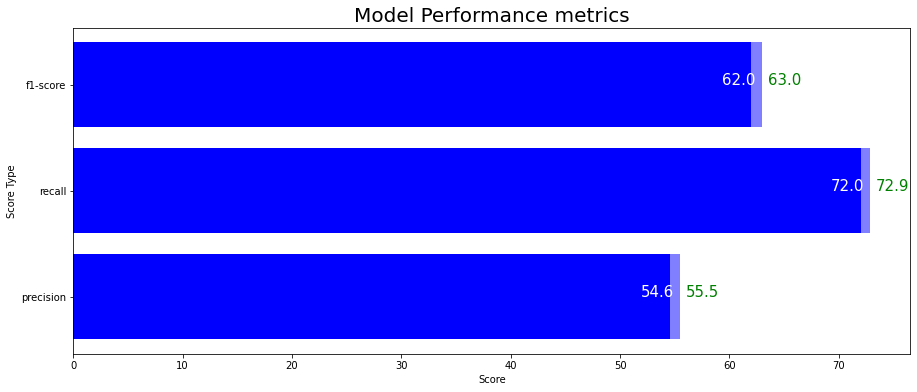

In [ ]:
# Visualizing performance metrics of our model
plt.figure(figsize = (15,6))
plt.barh(model_perf_dict['score'],model_perf_dict['average'],color = 'blue')
plt.barh(model_perf_dict['score'],model_perf_dict['can get upto'],color = 'blue', alpha = 0.5)
for i, v in enumerate(model_perf_dict['can get upto']):
     plt.text(v + 0.5, i, str(v), color='green', fontsize = 15)

for i, v in enumerate(model_perf_dict['average']):
     plt.text(v - 2.7, i, str(v), color='white', fontsize = 15)

plt.xlabel('Score')
plt.ylabel('Score Type')
plt.title('Model Performance metrics', fontsize = 20)

# **Comparison with other existing models :**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# F1-scores of different models
performance_dict = {'model_name' : ['TVSum unsupervised','SUM-GANdpp unsupervised','vsLSTM supervised','dppLSTM supervised','SUM-GANsup supervised',
                                    'Li et al. supervised','DR-DSN','HSA-RNN Supervised','DySeqDPP Supervised','CSNet','A-AVS supervised','AC-SUM-GAN','M-AVS supervised',
                                    'M-AVS(with extra layers) supervised(OURS)'],
                    'F1-score' : [51.3,51.7,54.2,54.7,56.3,52.7,57.6,59.8,58.4,58.8,59.4,60.6,61.0,62.0]}

performance_df = pd.DataFrame(performance_dict)
performance_df = performance_df.sort_values(['F1-score'])


Text(0.5, 1.0, 'Comparison of F1-scores of various models')

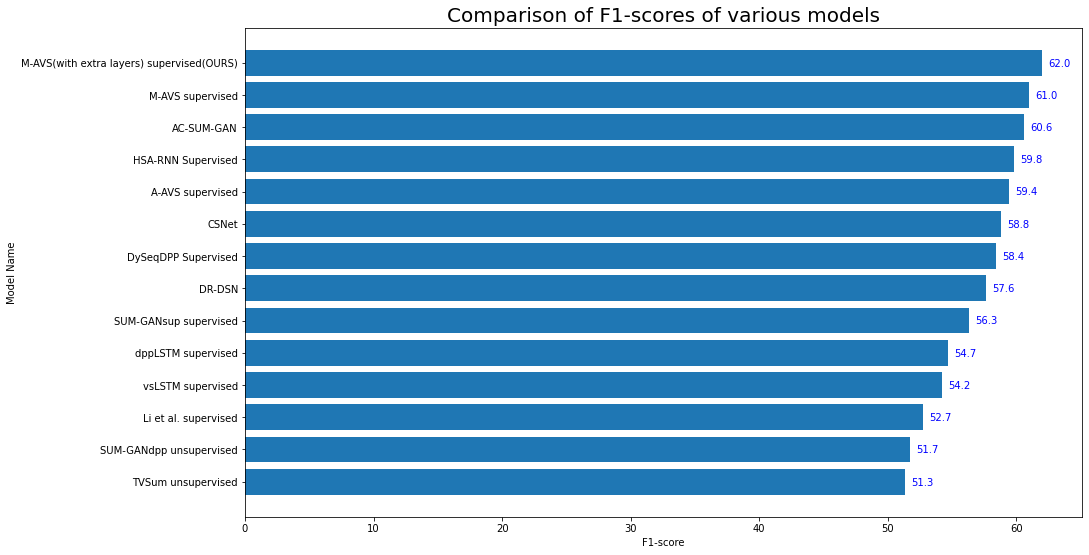

In [ ]:
# Visualizing F1-scores of different models
plt.figure(figsize = (15,9))
plt.barh(performance_df['model_name'],performance_df['F1-score'])
for i, v in enumerate(performance_df['F1-score']):
    plt.text(v + 0.5, i-0.1, str(v), color='blue')

plt.xlabel('F1-score')
plt.ylabel('Model Name')
plt.title('Comparison of F1-scores of various models', fontsize = 20)

# **Getting an Output :**

In [ ]:
# Reading the h5 file
data_file = h5py.File('fcsn_tvsum.h5')

In [ ]:
# Predicting scores for a particular video using the model
pred_score = model.predict(np.array(data_file['video_30']['feature']).reshape(-1,320,1024))
video_info = data_file['video_30']
pred_score, pred_selected, pred_summary = select_keyshots(video_info, pred_score)

In [ ]:
# Selected shots
pred_selected

[1, 5, 8, 13, 15, 18, 21, 24]

In [ ]:
# Getting the output summary video
import cv2
cps = video_info['change_points'][()]

video = cv2.VideoCapture('video_30.mp4')
frames = []
success, frame = video.read()
while success:
    frames.append(frame)
    success, frame = video.read()
frames = np.array(frames)
keyshots = []
for sel in pred_selected:
    for i in range(cps[sel][0], cps[sel][1]):
         keyshots.append(frames[i])
keyshots = np.array(keyshots)

video_writer = cv2.VideoWriter('summary.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 24, keyshots.shape[2:0:-1])
for frame in keyshots:
    video_writer.write(frame)
video_writer.release()